In [1]:
import numpy as np
import pandas as pd 
import sys
import os

# sys.path.append(os.path.abspath("../"))
from UCI_Dataset.MakeDataset import X_train, y_train,X_test,y_test




from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import tsfel


Training data shape:  (126, 500, 3)
Testing data shape:  (54, 500, 3)


 X_train_raw shape: (126, 1500)
[2 3 1 5 5 3 1 5 6 2 6 5 6 5 6 4 6 5 5 5 4 1 2 2 2 4 6 4 1 2 6 3 4 4 2 6 6
 3 4 5 4 1 2 4 4 5 2 4 1 1 1 6 2 4]
Accuracy: 0.6111
Precision (Weighted): 0.5611
Recall (Weighted): 0.6111

Confusion Matrix:


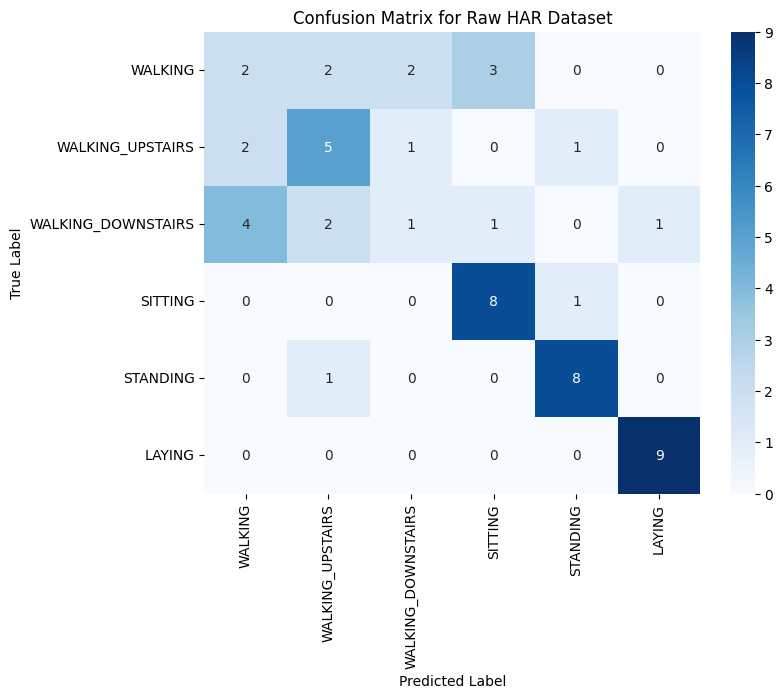

In [13]:
#RAW Dataset------------------------------------>
model = DecisionTreeClassifier(random_state=42)

n_train = X_train.shape[0]
n_test = X_test.shape[0]
X_train_new = X_train.reshape(n_train, -1)
X_test_new = X_test.reshape(n_test, -1)
print(f" X_train_raw shape: {X_train_new.shape}")
model.fit(X_train_new,y_train)

y_pred = model.predict(X_test_new)
print(y_pred)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
    
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Weighted): {precision:.4f}")
print(f"Recall (Weighted): {recall:.4f}\n")
    
print("Confusion Matrix:")

activity_labels = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING']
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
               xticklabels=activity_labels, yticklabels=activity_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix for Raw HAR Dataset')
plt.show()
plt.close()



C:\Users\Anurudh\AppData\Local\Temp\ipykernel_15208\2534518163.py:26: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(useful_cfg, df_sample, verbose=0)
C:\Users\Anurudh\AppData\Local\Temp\ipykernel_15208\2534518163.py:26: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(useful_cfg, df_sample, verbose=0)
C:\Users\Anurudh\AppData\Local\Temp\ipykernel_15208\2534518163.py:26: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(useful_cfg, df_sample, verbose=0)
C:\Users\Anurudh\AppData\Local\Temp\ipykernel_15208\2534518163.py:26: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(useful_cfg, df_sample, verbose=0)
C:\Users\Anurudh\AppData\Local\Temp\ipykernel_15208\2534518163.py:26: UserWarning: Using def

[3 1 2 5 5 3 1 5 3 2 6 5 6 5 6 1 6 5 2 5 4 3 2 2 1 4 6 4 1 2 6 2 4 4 2 6 6
 3 1 5 3 2 3 4 4 4 5 1 1 3 3 6 2 4]
Accuracy: 0.9259
Precision (Weighted): 0.9255
Recall (Weighted): 0.9259

Confusion Matrix:


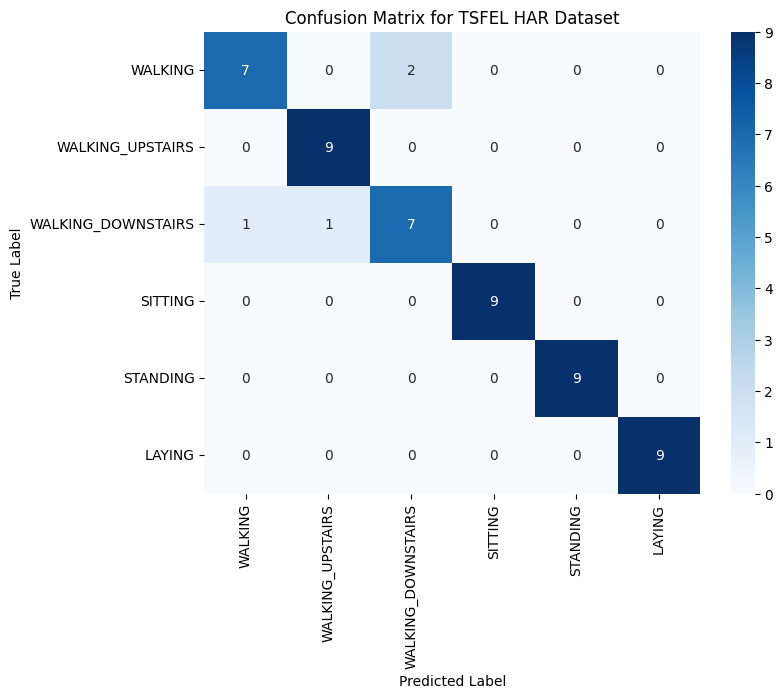

In [16]:
#TSFEL DATASET-------------------------------------->

cfg = tsfel.get_features_by_domain()

# Only Some features selected
useful_cfg = {
    "statistical": {
        "Mean": cfg["statistical"]["Mean"],
        "Standard deviation": cfg["statistical"]["Standard deviation"]
    },
    "temporal": {
        "Neighbourhood peaks": cfg["temporal"]["Neighbourhood peaks"]
    },
    "spectral": {
        "Spectral centroid": cfg["spectral"]["Spectral centroid"],
        "Maximum frequency": cfg["spectral"]["Maximum frequency"]
    }
}

X_train_tsfel_list = []
for sample in X_train:
    
    df_sample = pd.DataFrame(sample, columns=["acc_x", "acc_y", "acc_z"])
    
   
    features = tsfel.time_series_features_extractor(useful_cfg, df_sample, verbose=0)
    
    
    X_train_tsfel_list.append(features)

X_train_tsfel = pd.concat(X_train_tsfel_list).reset_index(drop=True)


X_test_tsfel_list = []
for sample in X_test:
 
    df_sample = pd.DataFrame(sample, columns=["acc_x", "acc_y", "acc_z"])
    

    features = tsfel.time_series_features_extractor(useful_cfg, df_sample, verbose=0)
    
 
    X_test_tsfel_list.append(features)


X_test_tsfel = pd.concat(X_test_tsfel_list).reset_index(drop=True)

model2= DecisionTreeClassifier(random_state=42)
model2.fit(X_train_tsfel,y_train)

y_pred2 = model2.predict(X_test_tsfel)
print(y_pred2)

accuracy = accuracy_score(y_test, y_pred2)
precision = precision_score(y_test, y_pred2, average='weighted')
recall = recall_score(y_test, y_pred2, average='weighted')
    
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Weighted): {precision:.4f}")
print(f"Recall (Weighted): {recall:.4f}\n")
    
print("Confusion Matrix:")

activity_labels = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING']
cm2 = confusion_matrix(y_test, y_pred2)
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', 
               xticklabels=activity_labels, yticklabels=activity_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix for TSFEL HAR Dataset')
plt.show()

[5 5 5 ... 2 1 2]
Accuracy: 0.8622
Precision (Weighted): 0.8633
Recall (Weighted): 0.8622

Confusion Matrix:


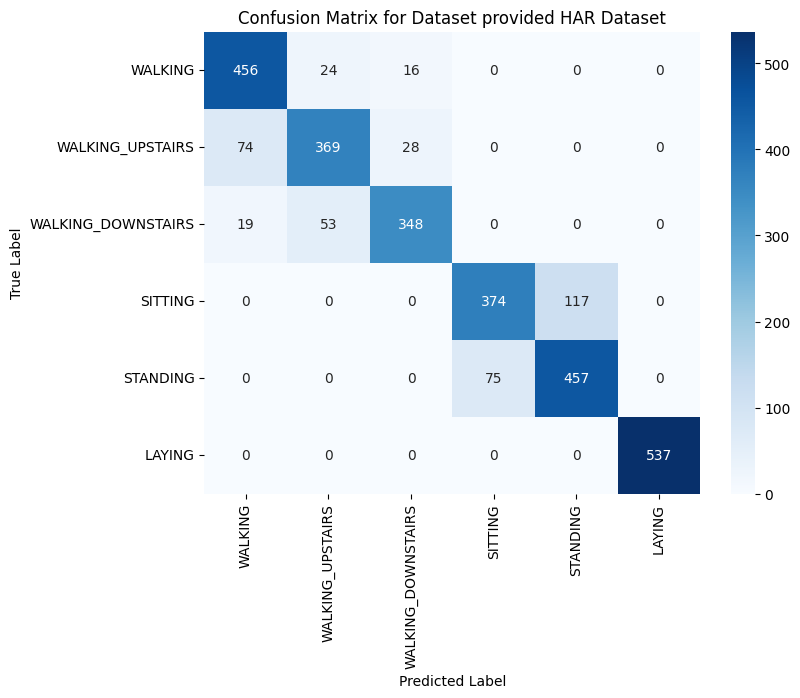

In [15]:
#-------------------Provided DATASET-------------------------------------->

dataset_dir = './UCI_Dataset'


X_train_3 = pd.read_csv(
    os.path.join(dataset_dir, 'train', 'X_train.txt'),sep='\s+',header=None )
y_train_3 = pd.read_csv(
    os.path.join(dataset_dir, 'train', 'y_train.txt'),sep='\s+',header=None)

X_test_3 = pd.read_csv(os.path.join(dataset_dir, 'test', 'X_test.txt'),sep='\s+',header=None)
y_test_3 = pd.read_csv(os.path.join(dataset_dir, 'test', 'y_test.txt'),sep='\s+',header=None)


model_3 = DecisionTreeClassifier(random_state=42)
model_3.fit(X_train_3,y_train_3)

y_pred3 = model_3.predict(X_test_3)
print(y_pred3)

accuracy = accuracy_score(y_test_3, y_pred3)
precision = precision_score(y_test_3, y_pred3, average='weighted')
recall = recall_score(y_test_3, y_pred3, average='weighted')
    
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Weighted): {precision:.4f}")
print(f"Recall (Weighted): {recall:.4f}\n")
    
print("Confusion Matrix:")

activity_labels = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING']
cm3 = confusion_matrix(y_test_3, y_pred3)
plt.figure(figsize=(8, 6))
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues', 
               xticklabels=activity_labels, yticklabels=activity_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix for Dataset provided HAR Dataset')
plt.show()





The model trained on TSFEL feature extracted dataset is better as it is having highest accuracy and precision while testing.

Question 2: 
Train Decision Tree with varying depths (2-8) using all above 3 methods. Plot the accuracy of the model on test data vs the depth of the tree.

C:\Users\Anurudh\AppData\Local\Temp\ipykernel_15208\3571018449.py:57: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(useful_cfg, df_sample, verbose=0)
C:\Users\Anurudh\AppData\Local\Temp\ipykernel_15208\3571018449.py:57: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(useful_cfg, df_sample, verbose=0)
C:\Users\Anurudh\AppData\Local\Temp\ipykernel_15208\3571018449.py:57: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(useful_cfg, df_sample, verbose=0)
C:\Users\Anurudh\AppData\Local\Temp\ipykernel_15208\3571018449.py:57: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(useful_cfg, df_sample, verbose=0)
C:\Users\Anurudh\AppData\Local\Temp\ipykernel_15208\3571018449.py:57: UserWarning: Using def

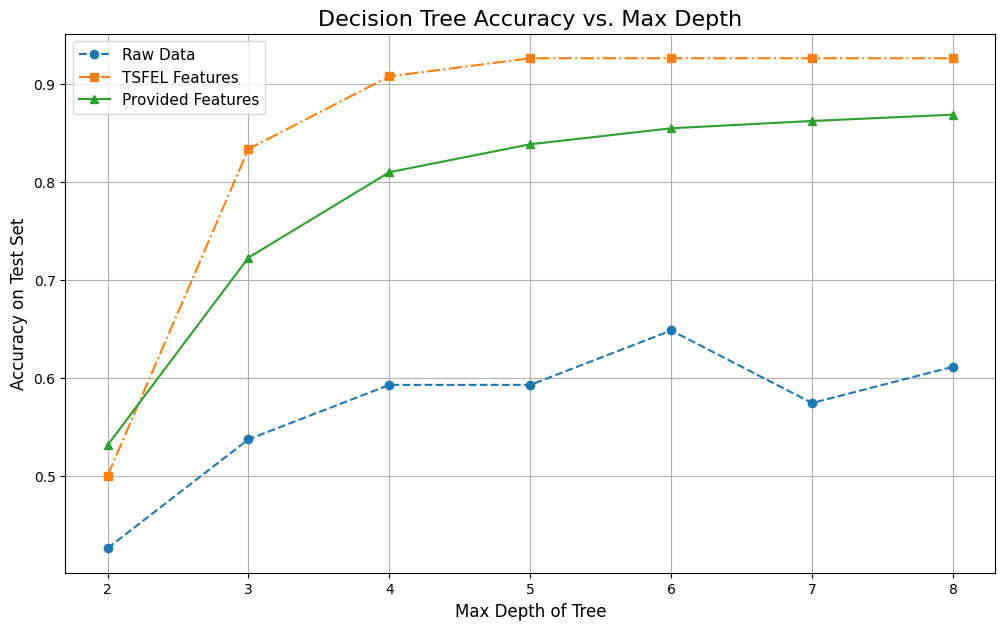

In [18]:
import numpy as np
import pandas as pd 
from UCI_Dataset.MakeDataset import X_train, y_train,X_test,y_test
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import tsfel
import os


depths = range(2, 9) 

accuracies_raw = []
accuracies_tsfel = []
accuracies_provided = []

#RAW data------------------------------->
n_train = X_train.shape[0]
n_test = X_test.shape[0]
X_train_new = X_train.reshape(n_train, -1)
X_test_new = X_test.reshape(n_test, -1)

# --- Loop for Raw Data ---
for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train_new,y_train)
    y_pred = model.predict(X_test_new)
    accuracies_raw.append(accuracy_score(y_test, y_pred))


#------------TSFEL-------------------------------->
cfg = tsfel.get_features_by_domain()

# Only Some features selected
useful_cfg = {
    "statistical": {
        "Mean": cfg["statistical"]["Mean"],
        "Standard deviation": cfg["statistical"]["Standard deviation"]
    },
    "temporal": {
        "Neighbourhood peaks": cfg["temporal"]["Neighbourhood peaks"]
    },
    "spectral": {
        "Spectral centroid": cfg["spectral"]["Spectral centroid"],
        "Maximum frequency": cfg["spectral"]["Maximum frequency"]
    }
}

X_train_tsfel_list = []
for sample in X_train:
    
    df_sample = pd.DataFrame(sample, columns=["acc_x", "acc_y", "acc_z"])
    
   
    features = tsfel.time_series_features_extractor(useful_cfg, df_sample, verbose=0)
    
    
    X_train_tsfel_list.append(features)

X_train_tsfel = pd.concat(X_train_tsfel_list).reset_index(drop=True)


X_test_tsfel_list = []
for sample in X_test:
 
    df_sample = pd.DataFrame(sample, columns=["acc_x", "acc_y", "acc_z"])
    

    features = tsfel.time_series_features_extractor(useful_cfg, df_sample, verbose=0)
    
 
    X_test_tsfel_list.append(features)


X_test_tsfel = pd.concat(X_test_tsfel_list).reset_index(drop=True)



# --- Loop for TSFEL Features --------------------->


for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train_tsfel, y_train)
    y_pred = model.predict(X_test_tsfel)
    accuracies_tsfel.append(accuracy_score(y_test, y_pred))


#---------------Given Data--------------->
dataset_dir = './UCI_Dataset'

X_train_3 = pd.read_csv(
    os.path.join(dataset_dir, 'train', 'X_train.txt'),sep='\s+',header=None )
y_train_3 = pd.read_csv(
    os.path.join(dataset_dir, 'train', 'y_train.txt'),sep='\s+',header=None)

X_test_3 = pd.read_csv(os.path.join(dataset_dir, 'test', 'X_test.txt'),sep='\s+',header=None)
y_test_3 = pd.read_csv(os.path.join(dataset_dir, 'test', 'y_test.txt'),sep='\s+',header=None)



for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train_3, y_train_3)
    y_pred = model.predict(X_test_3)
    accuracies_provided.append(accuracy_score(y_test_3, y_pred))



plt.figure(figsize=(12, 7))

# Plot a line for each dataset
plt.plot(depths, accuracies_raw, marker='o', linestyle='--', label='Raw Data')
plt.plot(depths, accuracies_tsfel, marker='s', linestyle='-.', label='TSFEL Features')
plt.plot(depths, accuracies_provided, marker='^', linestyle='-', label='Provided Features')

# Add titles and labels for clarity
plt.title('Decision Tree Accuracy vs. Max Depth', fontsize=16)
plt.xlabel('Max Depth of Tree', fontsize=12)
plt.ylabel('Accuracy on Test Set', fontsize=12)
plt.xticks(depths)
plt.legend(fontsize=11)
plt.grid(True)
plt.show()

Question 3:

The model trained on RAW dataset is working poor because the features are not explicitely mentioned. THe optimum depth of RAW data is 6.
The model trained on TSFEL dataset is working the best and the optimum depth is 5.
THe optimum depth on Provided Dataset is 8. 
TSFEL features can be more informative and outperform the large, precomputed feature set for Decision Trees. The reasoning is that the high-dimensional, 561-feature set might contain noisy or irrelevant features that are not ideal for a Decision Tree, whereas a smaller, custom set can be more discriminative. 